# Clustering Algortihms

In Machine Learning, the types of Learning can broadly be classified into three types: 

####  1. Supervised Learning,  
####  2. Unsupervised Learning and   
####  3. Semi-supervised Learning.  

Algorithms belonging to the family of Unsupervised Learning have no variable to predict tied to the data. Instead of having an output, the data only has an input which would be multiple variables that describe the data. This is where clustering comes in.

Clustering is the task of grouping together a set of objects in a way that objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a metric that reflects the strength of relationship between two data objects. Clustering is mainly used for exploratory data mining. It has manifold usage in many fields such as machine learning, pattern recognition, image analysis, information retrieval, bio-informatics, data compression, and computer graphics.

# Simple Clustering

## K-Means 

There are many models for **clustering** out there. We will be using **K-Means**. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, we see how to use k-Means for customer segmentation.

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Importing Dataset
sample_dataset = pd.read_csv("income.csv")
sample_dataset.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


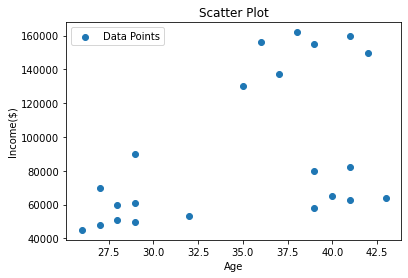

In [35]:
# Plotting Dataset
fig, ax = plt.subplots()

ax.scatter(sample_dataset["Age"],sample_dataset["Income($)"],label = "Data Points")
ax.set(title = "Scatter Plot",xlabel = "Age",ylabel = "Income($)");
ax.legend();

Here on intuition we can see *3* different clusters.
but if in case the data is very large then we facce dfficulty in finding the number of clusters then, **Elbow Method** is used.
**Elbow method** tells us to select the cluster when there is a significant change in inertia.

In [19]:
km = KMeans(n_clusters = 3)

In [20]:
y_predicted = km.fit_predict(sample_dataset[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [23]:
# Adding a column of Cluster Number
sample_dataset['Cluster Number'] = y_predicted
sample_dataset.head()

,Name,Age,Income($),Cluster Number
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [24]:
# Identifying Centriod of Clusters
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

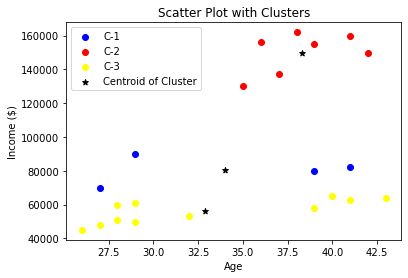

In [25]:
# Plotting the Centriod Points
df1 = sample_dataset[sample_dataset["Cluster Number"] == 0]
df2 = sample_dataset[sample_dataset["Cluster Number"] == 1]
df3 = sample_dataset[sample_dataset["Cluster Number"] == 2]

plt.scatter(df1["Age"],df1['Income($)'],color='Blue',label = "C-1")
plt.scatter(df2["Age"],df2['Income($)'],color='Red',label = "C-2")
plt.scatter(df3["Age"],df3['Income($)'],color='Yellow',label = "C-3")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='Black',marker='*',label='Centroid of Cluster')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend();
plt.title("Scatter Plot with Clusters");

#### Here Preprocessing needs to be done to correct the clusters as we can see clusters are not formed very precise.

In [41]:
# Preprocessing using MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(sample_dataset[['Income($)']])
sample_dataset['Income($)'] = scaler.transform(sample_dataset[['Income($)']])

scaler.fit(sample_dataset[['Age']])
sample_dataset['Age'] = scaler.transform(sample_dataset[['Age']])

In [42]:
# Preprocessed Dataset
sample_dataset.head()

,Name,Age,Income($),Cluster Number
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


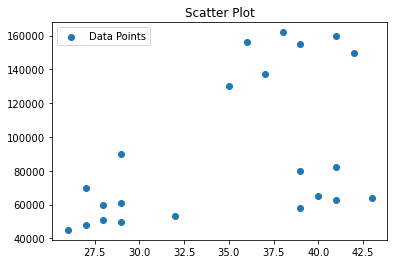

In [26]:
# Plotting pre-processed Dataset
plt.scatter(sample_dataset["Age"],sample_dataset["Income($)"],label = "Data Points");
plt.title("Scatter Plot");
plt.legend();

In [30]:
#Now again trying creating clusters
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(sample_dataset[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [45]:
# Adding the Cluster Number column
sample_dataset['Cluster Number'] = y_predicted
sample_dataset.head()

,Name,Age,Income($),Cluster Number
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [46]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

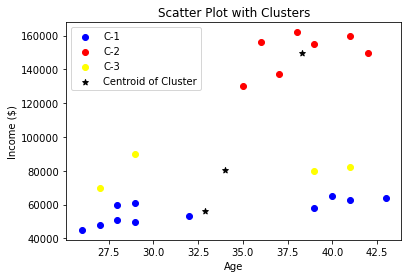

In [47]:
df1 = sample_dataset[sample_dataset["Cluster Number"] == 0]
df2 = sample_dataset[sample_dataset["Cluster Number"] == 1]
df3 = sample_dataset[sample_dataset["Cluster Number"] == 2]

plt.scatter(df1["Age"],df1['Income($)'],color='Blue',label = "C-1")
plt.scatter(df2["Age"],df2['Income($)'],color='Red',label = "C-2")
plt.scatter(df3["Age"],df3['Income($)'],color='Yellow',label = "C-3")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='Black',marker='*',label='Centroid of Cluster')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend();
plt.title("Scatter Plot with Clusters");


### Elbow Method

In [48]:
sse = [] # SSE stands for Sum of Sqaured Errors
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(sample_dataset[["Age","Income($)"]])
    sse.append(km.inertia_)  # inertia calculates SSE 
    
sse 

[39748148458.54546,
 3318233941.1619043,
 1577046058.883117,
 814746044.2545456,
 296500418.0952381,
 231967084.46190482,
 173633694.45000002,
 119633613.78333332,
 92633459.69999997]

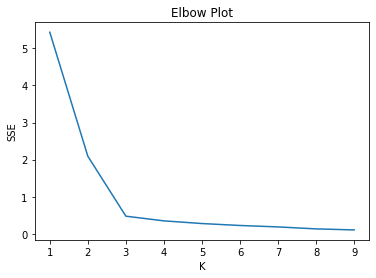

In [49]:
fig,ax = plt.subplots()

ax.plot(range(1,10),sse);
ax.set(title = "Elbow Plot",xlabel = "K", ylabel = "SSE");